## Week 02: Linear least squares and Python examples
### Math goals
- determine whether a model is linear in its parameters
- given a linear model, identify the basis functions
- write a linear model as a matrix equation $A\mathbf{c} = \mathbf{y}$
- construct the normal equations associated with a matrix equation
- describe the relationship between $\mathbf{y}$ and $A\overline{\mathbf{c}}$ where $\overline{\mathbf{c}}$ is the least squares solution to the matrix equation above
- stuff about other norms...
- calculate the error magnification for a particular problem given the true input $x$, the exact output $y$, the actual output $ya$, and an input for which $ya$ is the correct output $xa$.

### Python goals
1. define a matrix
1. multiply a matrix and a vector
1. construct a matrix transpose
1. compute a matrix inverse
1. find a matrix condition number (Frobenius norm)
1. solve a linear least square problem using a built-in command
1. create an array with evenly spaced entries
1. construct a least squares matrix given a list of basis functions and the input values
1. construct model output given a list of basis functions, input values, and coefficients
1. add axis labels and a legend to a plot
1. plot points vs lines
1. make a scatter plot

In [53]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [32]:
# 1. define a matrix
# define a vector
# 2. multiply a matrix and a vector

a = np.array([[2,3],[1,4],[5,-1]])
x = np.array([7,-1])
# method 1: np.matmul
b = np.matmul(a,x)
# method 2: @
b1 = a@x
print("two ways to multiply a matrix and a vector:", b, b1)

# you may see np.dot(A,x) as a third way.  
#  Its output will be different than np.matmul for some inputs: np.matmul is preferred.

two ways to multiply a matrix and a vector: [11  3 36] [11  3 36]


In [44]:
# 3. construct a matrix transpose
# 4. compute a matrix inverse
a_transpose = a.T

# make the matrix square by finding A.T @ A, then invert.
a_inv = linalg.inv(a.T@a)

# 5. find the condition number (Frobenius norm, a matrix norm)
cond_num = linalg.expm_cond(a.T@a)
print(cond_num)

40.32369029840947


In [45]:
# 6. find a least squares solution
b = np.array([10,2,33])
x,error_sq,rank,sing_values = linalg.lstsq(a,b,cond=0)
print('the least square solution is',x)
print('the square of the 2-norm of the error vector is',error_sq)
print('the matrix has rank',rank)

the least square solution is [ 6.40662252 -1.0397351 ]
the square of the 2-norm of the error vector is 0.16026490066224686
the matrix has rank 2


[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5]


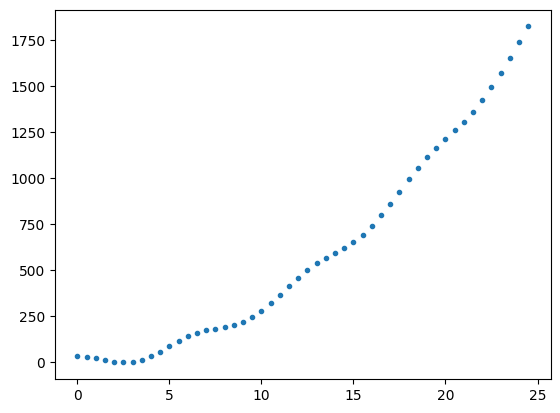

In [57]:
# 7. create an array with evenly spaced entries
t_vector = np.arange(0,25,0.5)
print(t_vector)

# 8. construct a least squares matrix given a list of basis functions and the input values
def f0(input):
    """create a vector of 1s of the same length as input."""
    return 1+0*input

def f1(input):
    """create a vector input-squared"""
    return input**2

def f2(input):
    """create a vector cosine(input)"""
    return np.cos(input)

basis_functions = [f0,f1,f2]
# use list comprehension to create the matrix from the basis functions
a_matrix = np.vstack([f(t_vector) for f in basis_functions]).T

# 9. construct model output given a list of basis functions, input values, and coefficients
def model(c, basis, input):
    """evaluate the model"""
    a_matrix = np.vstack([f(t_vector) for f in basis_functions]).T
    return a_matrix@c

c = np.array([1, 3, 30])
y_vector = model(c, basis_functions,t_vector)

plt.plot(t_vector,y_vector,'.')

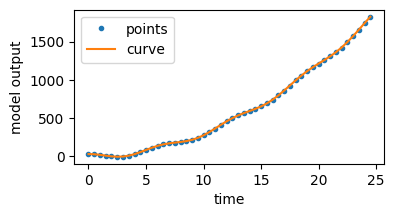

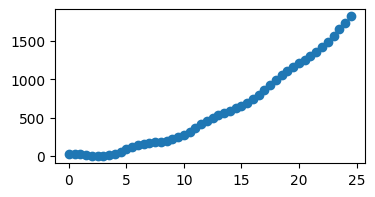

In [65]:
# 10. add axis labels and a legend to a plot
# 11. plot points or lines

plt.figure(figsize=[4,2])
plt.plot(t_vector,y_vector,'.',label='points')
plt.plot(t_vector,y_vector,label='curve')
# gca stands for "get current axis"
plt.gca().legend()
plt.xlabel('time')
plt.ylabel('model output')
plt.show()

# 12. make a scatter plot
plt.figure(figsize=[4,2])
plt.scatter(t_vector,y_vector)